In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv("austin_bikeshare_20191101.csv")

In [3]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_date'] = df['start_time'].dt.date
df['start_hour'] = df['start_time'].dt.hour

In [4]:
date = '2019-11-05'
print(date)

2019-11-05


In [5]:
filter_df = df[df['start_date'].astype(str) == date]

In [6]:
filter_df.head()

,trip_id,subscriber_type,bikeid,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_date,start_hour
0,21204361,Local30,2124,2019-11-05 12:49:51+00:00,4050,5th/Campbell,3660,East 6th/Medina,21,2019-11-05,12
182,21203639,Single Trip (Pay-as-you-ride),1543,2019-11-05 11:17:07+00:00,4059,Nash Hernandez/East @ RBJ South,4059,Nash Hernandez/East @ RBJ South,7,2019-11-05,11
183,21203659,24 Hour Walk Up Pass,336G,2019-11-05 11:21:37+00:00,4061,Lakeshore/Austin Hostel,4061,Lakeshore/Austin Hostel,34,2019-11-05,11
184,21206699,Pay-as-you-ride,123,2019-11-05 17:37:49+00:00,4062,Lakeshore/Pleasant Valley,4062,Lakeshore/Pleasant Valley,15,2019-11-05,17
207,21203633,Single Trip (Pay-as-you-ride),588,2019-11-05 11:16:30+00:00,4059,Nash Hernandez/East @ RBJ South,4059,Nash Hernandez/East @ RBJ South,9,2019-11-05,11


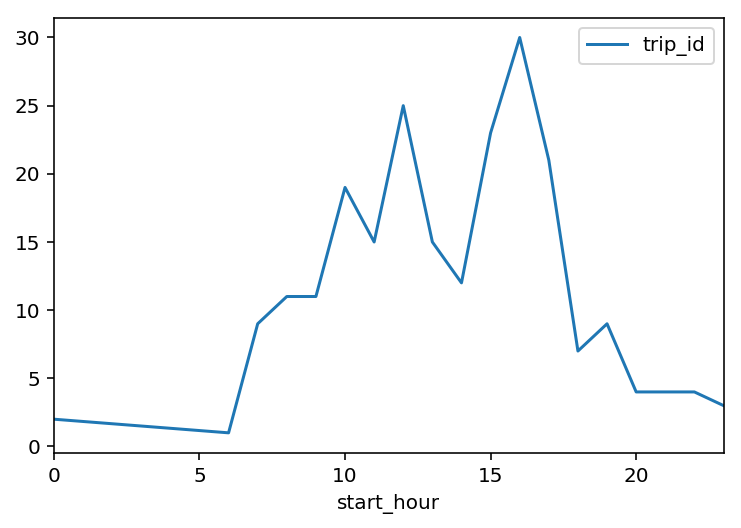

In [7]:
filter_df.groupby(['start_hour'])[['trip_id']].count().plot();

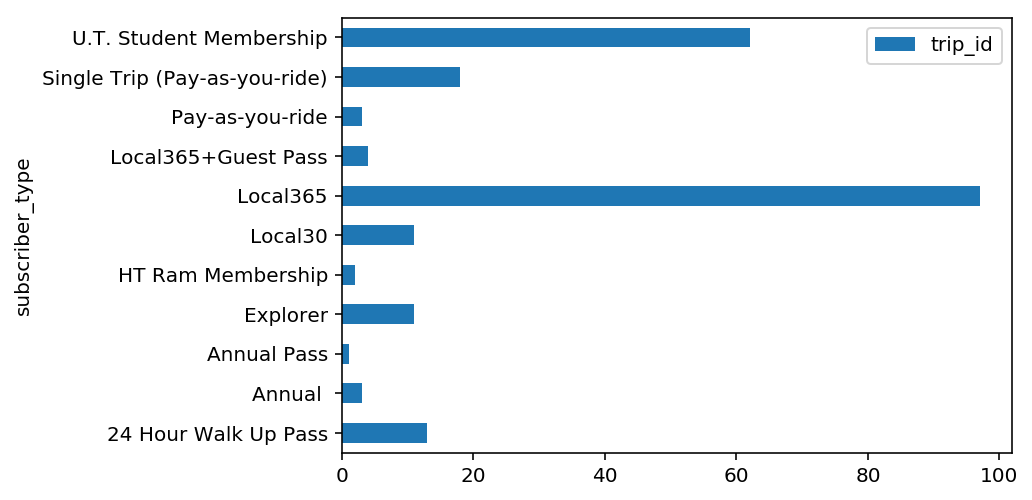

In [8]:
filter_df.groupby(['subscriber_type'])[['trip_id']].count().plot.barh();

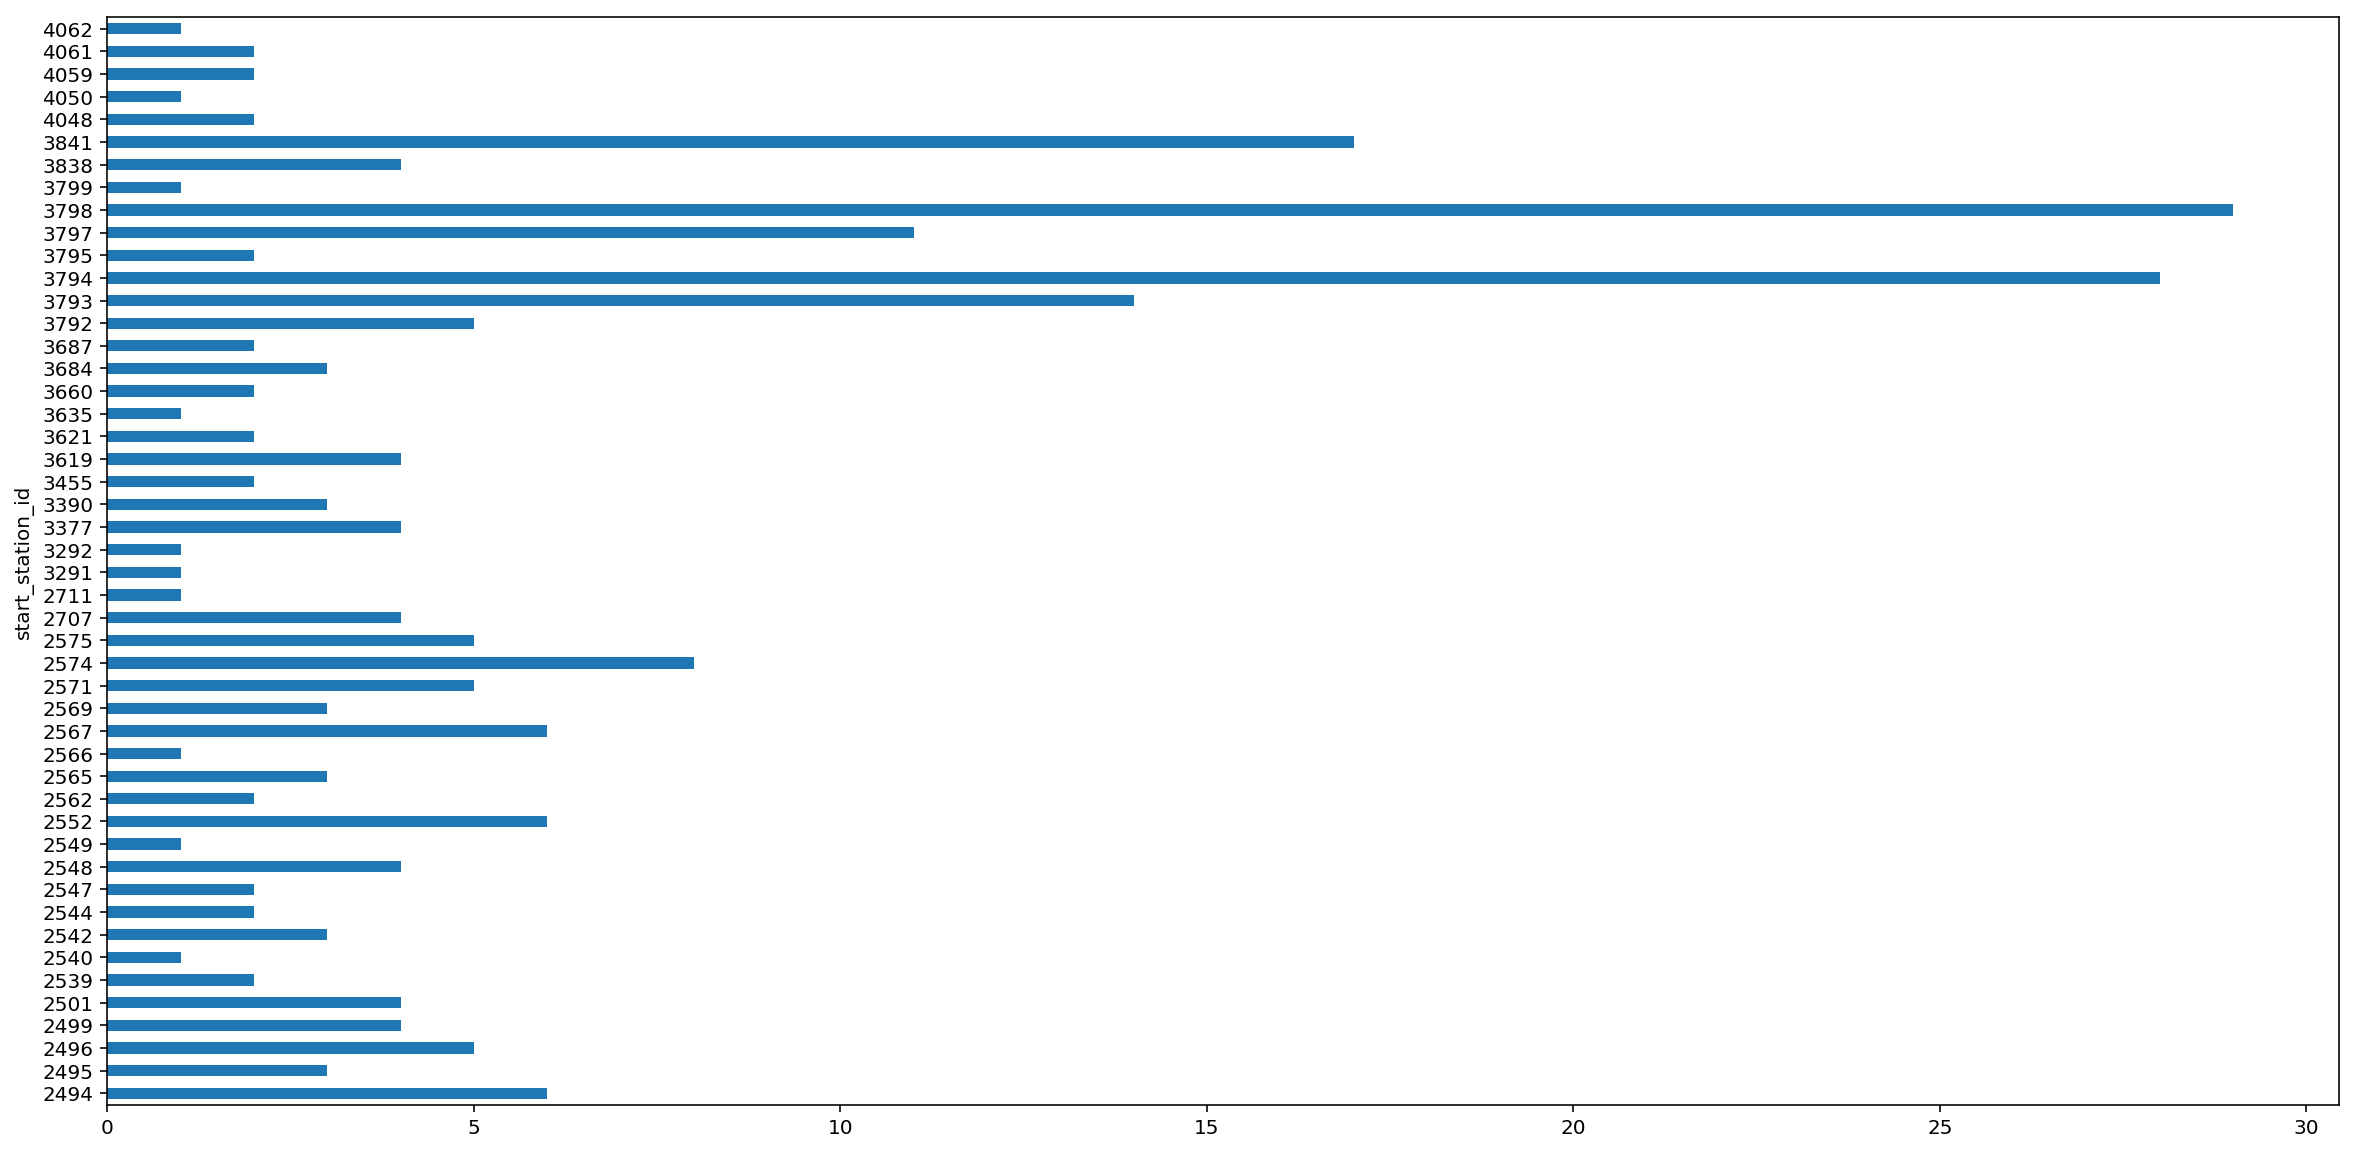

In [9]:
filter_df.groupby(['start_station_id'])['start_station_id'].count().plot.barh(figsize=(20, 10));

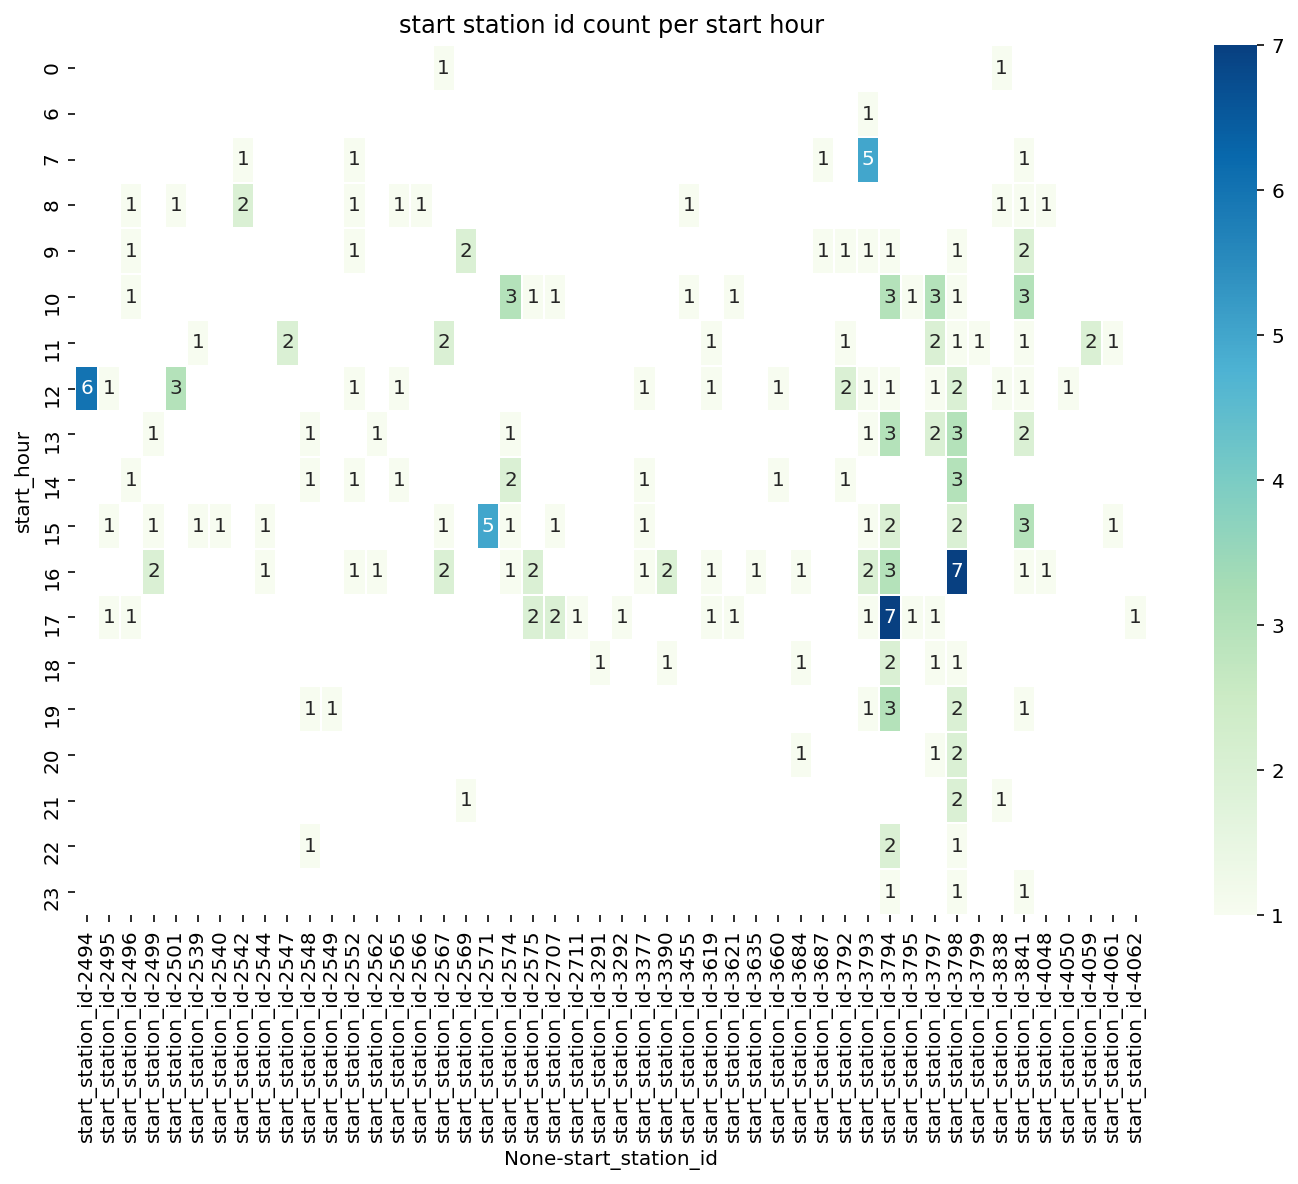

In [10]:
plt.figure(figsize=(12,8))
plt.title("start station id count per start hour")
sns.heatmap(filter_df.groupby(['start_hour', 'start_station_id'])[['start_station_id']].count().unstack(),
           lw=.5, annot=True, cmap='GnBu', fmt='g', annot_kws={'size':10});